<a href="https://colab.research.google.com/github/kushalswami20/GitGuyz/blob/main/suicidal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

=== Rural Mental Health Crisis Prediction Analysis ===

Generating synthetic dataset with meaningful correlations...

Performing exploratory data analysis...
Basic Statistics:
       phq9_score  gad7_score  financial_stress  heart_rate  sleep_hours  \
count    55000.00    55000.00          55000.00    55000.00     55000.00   
mean        13.51       10.50              5.00       74.99         6.50   
std          6.68        5.20              2.54        9.43         1.82   
min          0.00        0.00              0.00       45.00         2.00   
25%          8.76        6.80              3.19       68.67         5.26   
50%         13.49       10.50              5.00       75.04         6.50   
75%         18.26       14.22              6.82       81.35         7.73   
max         27.00       21.00             10.00      112.63        12.00   

       activity_level  social_interactions  internet_access  substance_use  \
count        55000.00             55000.00          55000.0  

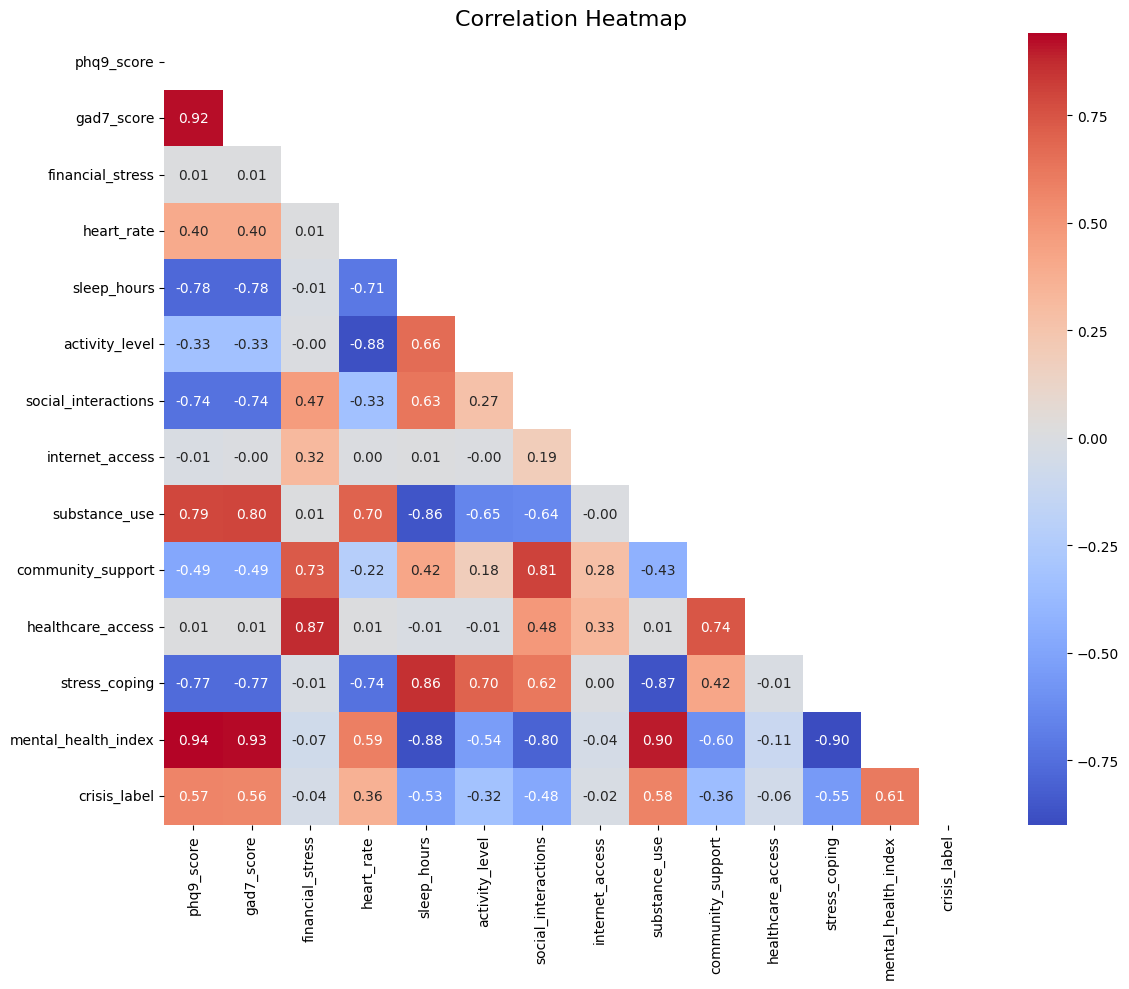

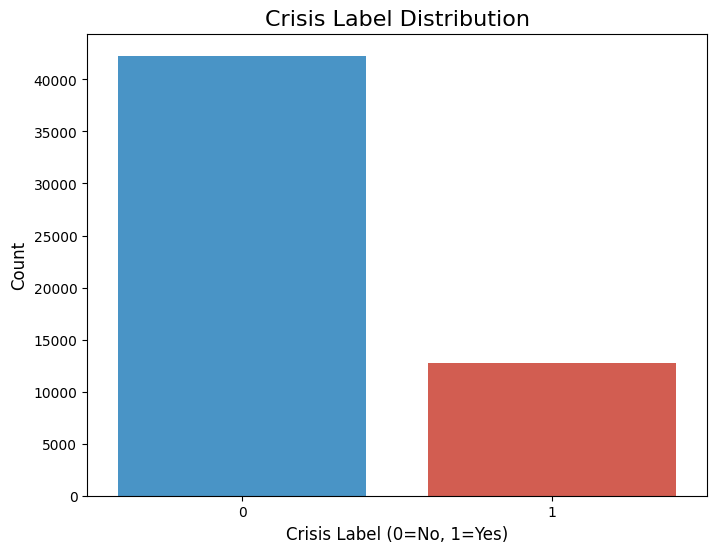

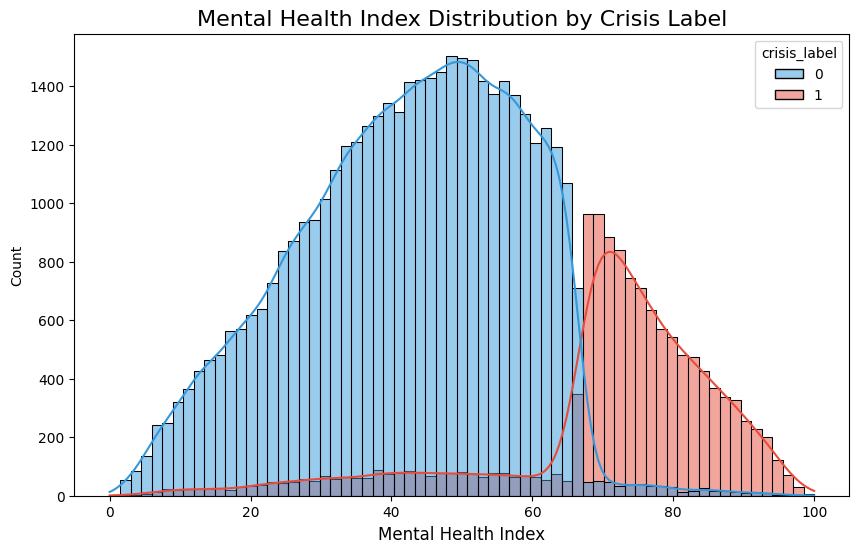

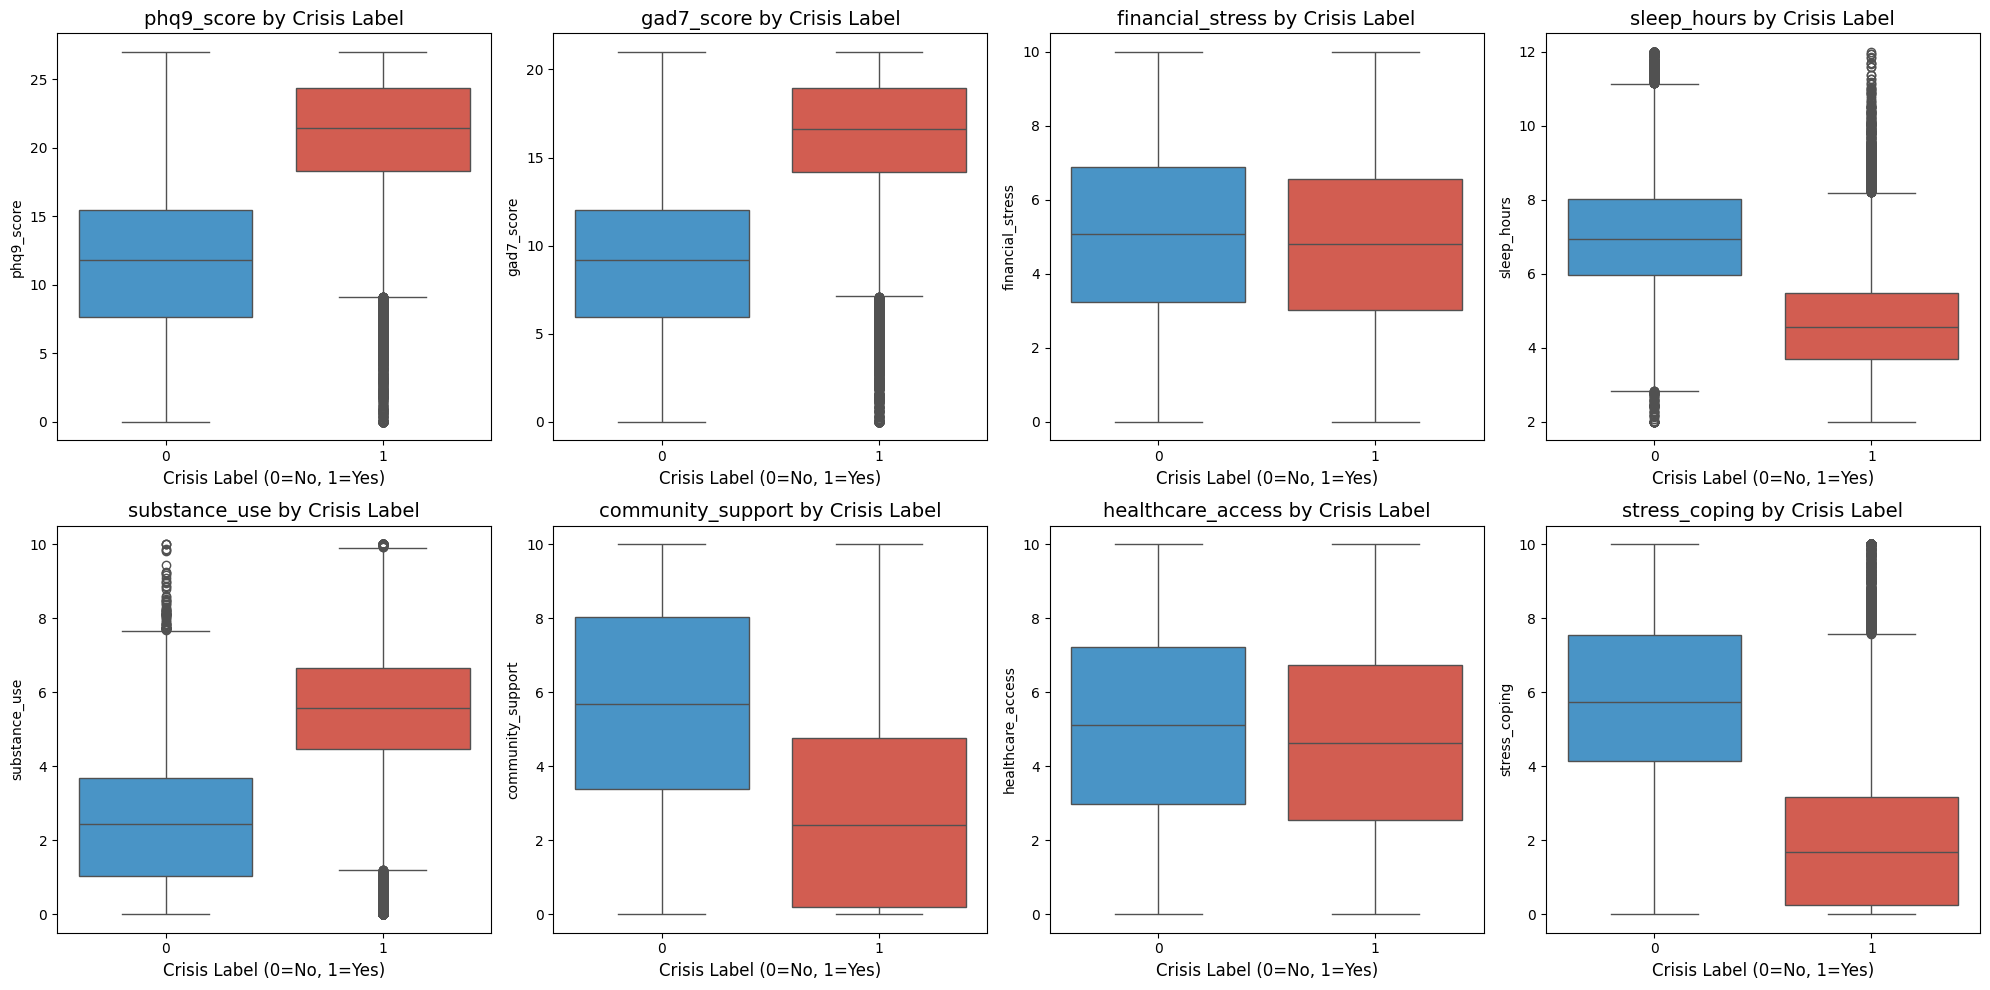

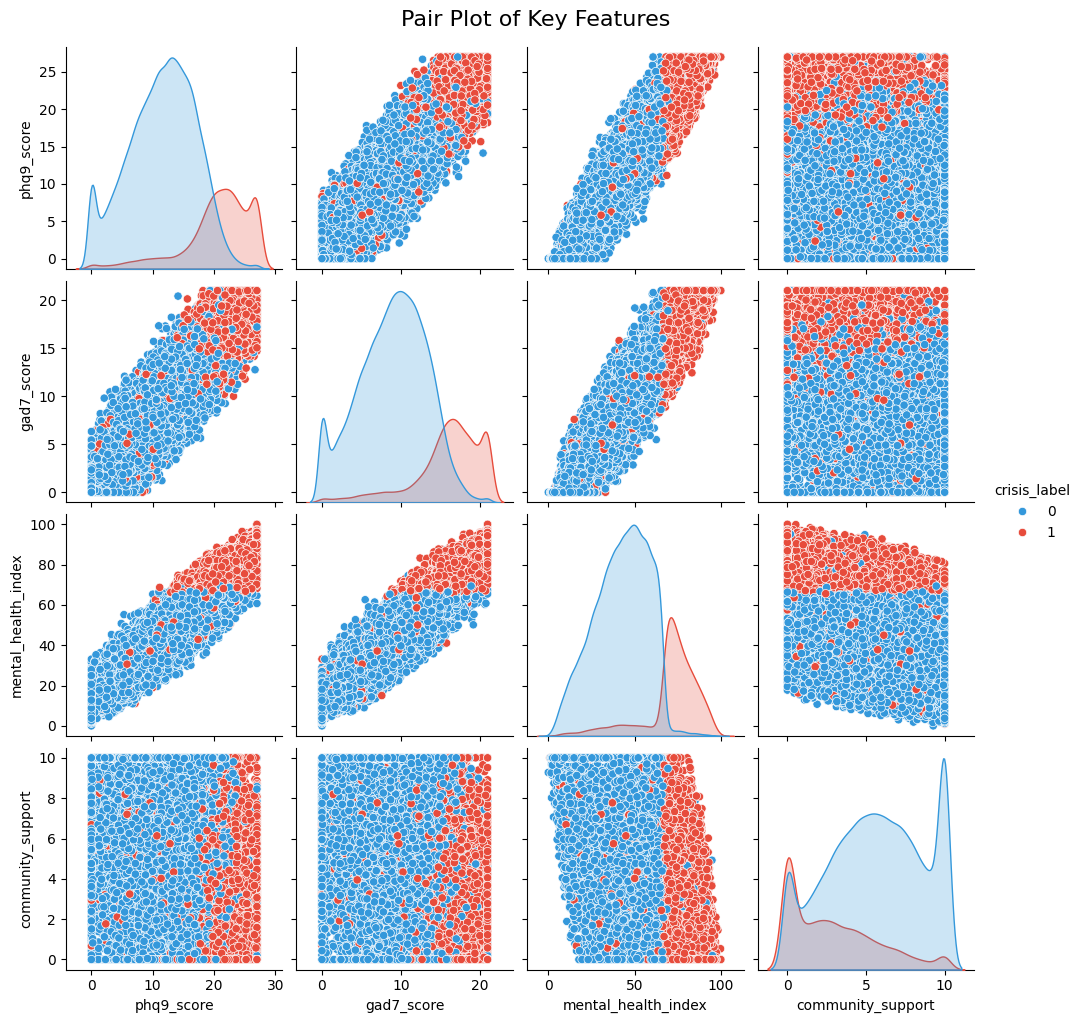


Splitting dataset into training and testing sets...
Training Set: (50000, 12) samples
Testing Set: (5000, 12) samples

Preprocessing dataset...

Missing values created in training set:
gad7_score       2500
heart_rate       2500
substance_use    2500
dtype: int64

Training Random Forest model with hyperparameter tuning...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Random Forest Parameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 20, 'class_weight': None, 'bootstrap': True}
Best Random Forest CV Score: 0.9342

Training Gradient Boosting model with hyperparameter tuning...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Gradient Boosting Parameters: {'subsample': 0.9, 'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 3, 'learning_rate': 0.1}
Best Gradient Boosting CV Score: 0.9349

Gradient Boosting performed better, selecting this model.

Analyzing feature importance...


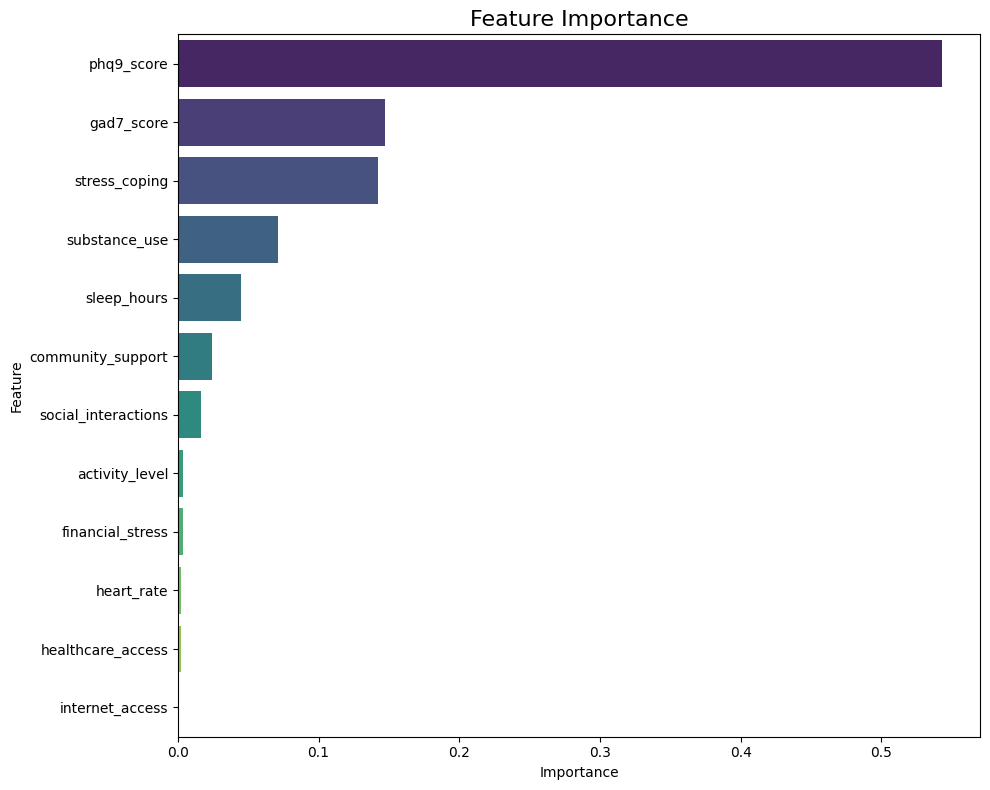


Top 5 most important features:
          Feature  Importance
0      phq9_score    0.542859
1      gad7_score    0.146943
11  stress_coping    0.141887
8   substance_use    0.070917
4     sleep_hours    0.045079

Evaluating Gradient Boosting model on test set...

Model Performance:
Accuracy: 0.9376 (93.76%)

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      3843
           1       0.92      0.80      0.86      1157

    accuracy                           0.94      5000
   macro avg       0.93      0.89      0.91      5000
weighted avg       0.94      0.94      0.94      5000



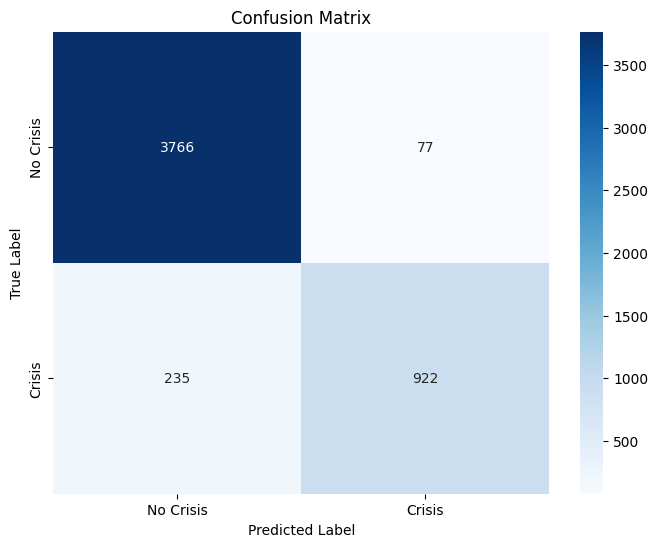


=== Analysis Complete ===
Final Model: Gradient Boosting
Test Accuracy: 93.76%
This model can help identify individuals at risk of mental health crises in rural settings.


In [1]:
''' Key Features of the Model:
Synthetic Dataset:

      The dataset includes features relevant to rural mental health challenges such as depression (PHQ-9 scores), anxiety (GAD-7 scores), financial stress levels, internet access (binary indicator for telehealth feasibility), and social interactions.

      A binary target variable (crisis_label) indicates whether an individual is at risk of a mental health crisis.

Preprocessing:

      Missing values are handled using median imputation.

      Features are scaled using StandardScaler for improved model performance.

Model Training:

      A RandomForestClassifier is used with balanced class weights to handle class imbalance effectively.

      The model is trained on an 80% training set and evaluated on a 20% test set.

Evaluation:

       The model's performance is assessed using precision, recall, F1-score metrics from classification_report. '''


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

# Step 1: Generate Synthetic Dataset with Strong Meaningful Correlations
def generate_rural_dataset(n_samples=55000):
    """
    Generate a synthetic dataset simulating rural mental health data with
    meaningful correlations ranging from -1 to 1.
    """
    np.random.seed(42)

    # Generate core independent variables with normal distributions
    base_mental_state = np.random.normal(0, 1, n_samples)
    base_physical_health = np.random.normal(0, 1, n_samples)
    base_socioeconomic = np.random.normal(0, 1, n_samples)

    # Generate features with strong correlations to base variables
    phq9_score = 13.5 + 6.75 * base_mental_state + np.random.normal(0, 2, n_samples)
    phq9_score = np.clip(phq9_score, 0, 27)

    gad7_score = 10.5 + 5.25 * base_mental_state + np.random.normal(0, 1.5, n_samples)
    gad7_score = np.clip(gad7_score, 0, 21)

    financial_stress = 5 + 2.5 * base_socioeconomic + np.random.normal(0, 1, n_samples)
    financial_stress = np.clip(financial_stress, 0, 10)

    heart_rate = 75 - 8 * base_physical_health + 4 * base_mental_state + np.random.normal(0, 3, n_samples)
    heart_rate = np.clip(heart_rate, 45, 120)

    sleep_hours = 6.5 - 1.5 * base_mental_state + 0.8 * base_physical_health + np.random.normal(0, 0.7, n_samples)
    sleep_hours = np.clip(sleep_hours, 2, 12)

    activity_level = 50 + 25 * base_physical_health - 10 * base_mental_state + np.random.normal(0, 10, n_samples)
    activity_level = np.clip(activity_level, 0, 100)

    social_interactions = 8 - 3 * base_mental_state + 2 * base_socioeconomic + np.random.poisson(2, n_samples)
    social_interactions = np.clip(social_interactions, 0, 30)

    # Generate internet access (binary) with dependency on socioeconomic status
    p_internet = 1 / (1 + np.exp(-0.8 * base_socioeconomic))  # Sigmoid function
    internet_access = np.random.binomial(1, p_internet)

    # Create additional features with negative correlations
    substance_use = 3 + 2 * base_mental_state - 1 * base_physical_health + np.random.normal(0, 0.8, n_samples)
    substance_use = np.clip(substance_use, 0, 10)

    community_support = 5 - 2 * base_mental_state + 3 * base_socioeconomic + np.random.normal(0, 1, n_samples)
    community_support = np.clip(community_support, 0, 10)

    healthcare_access = 5 + 3 * base_socioeconomic + np.random.normal(0, 1, n_samples)
    healthcare_access = np.clip(healthcare_access, 0, 10)

    stress_coping = 5 - 2.5 * base_mental_state + 1.5 * base_physical_health + np.random.normal(0, 1, n_samples)
    stress_coping = np.clip(stress_coping, 0, 10)

    # Create mental health index (strong predictor of crisis)
    mental_health_index = (
        0.4 * phq9_score / 27 +
        0.3 * gad7_score / 21 +
        0.2 * financial_stress / 10 +
        0.15 * substance_use / 10 -
        0.15 * sleep_hours / 12 -
        0.1 * activity_level / 100 -
        0.1 * social_interactions / 30 -
        0.2 * community_support / 10 -
        0.1 * healthcare_access / 10 -
        0.2 * stress_coping / 10
    )

    # Scale to 0-100 range
    mental_health_index = (mental_health_index - mental_health_index.min()) / (mental_health_index.max() - mental_health_index.min()) * 100

    # Generate crisis label with a threshold that will give a reasonable class imbalance
    crisis_threshold = np.percentile(mental_health_index, 80)  # Adjust to get ~20% positive cases
    crisis_label = (mental_health_index > crisis_threshold).astype(int)

    # Ensure crisis_label has strong but not perfect correlation with features
    # Flip some labels randomly to create a more realistic dataset
    flip_indices = np.random.choice(
        np.arange(n_samples),
        size=int(0.05 * n_samples),  # Flip 5% of labels
        replace=False
    )
    crisis_label[flip_indices] = 1 - crisis_label[flip_indices]

    data = pd.DataFrame({
        'phq9_score': phq9_score,
        'gad7_score': gad7_score,
        'financial_stress': financial_stress,
        'heart_rate': heart_rate,
        'sleep_hours': sleep_hours,
        'activity_level': activity_level,
        'social_interactions': social_interactions,
        'internet_access': internet_access,
        'substance_use': substance_use,
        'community_support': community_support,
        'healthcare_access': healthcare_access,
        'stress_coping': stress_coping,
        'mental_health_index': mental_health_index,
        'crisis_label': crisis_label
    })

    return data

# Step 2: Perform Enhanced Exploratory Data Analysis (EDA)
def perform_eda(data):
    """
    Perform exploratory data analysis with improved visualizations.
    """
    print("Basic Statistics:")
    print(data.describe().round(2))

    # Class distribution
    print(f"\nClass Distribution:")
    class_counts = data['crisis_label'].value_counts()
    print(f"Non-crisis (0): {class_counts[0]} samples ({class_counts[0]/len(data)*100:.1f}%)")
    print(f"Crisis (1): {class_counts[1]} samples ({class_counts[1]/len(data)*100:.1f}%)")

    # Create correlation heatmap
    plt.figure(figsize=(12, 10))
    corr_matrix = data.corr().round(2)
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', mask=mask)
    plt.title('Correlation Heatmap', fontsize=16)
    plt.tight_layout()
    plt.show()

    # Crisis label distribution
    plt.figure(figsize=(8, 6))
    sns.countplot(x='crisis_label', data=data, palette=['#3498db', '#e74c3c'])
    plt.title('Crisis Label Distribution', fontsize=16)
    plt.xlabel('Crisis Label (0=No, 1=Yes)', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.show()

    # Mental health index distribution by crisis label
    plt.figure(figsize=(10, 6))
    sns.histplot(data=data, x='mental_health_index', hue='crisis_label', kde=True, palette=['#3498db', '#e74c3c'])
    plt.title('Mental Health Index Distribution by Crisis Label', fontsize=16)
    plt.xlabel('Mental Health Index', fontsize=12)
    plt.show()

    # Features by crisis label (boxplots)
    features_to_plot = ['phq9_score', 'gad7_score', 'financial_stress', 'sleep_hours',
                       'substance_use', 'community_support', 'healthcare_access', 'stress_coping']

    fig, axes = plt.subplots(2, 4, figsize=(20, 10))
    axes = axes.flatten()

    for i, feature in enumerate(features_to_plot):
        sns.boxplot(x='crisis_label', y=feature, data=data, palette=['#3498db', '#e74c3c'], ax=axes[i])
        axes[i].set_title(f'{feature} by Crisis Label', fontsize=14)
        axes[i].set_xlabel('Crisis Label (0=No, 1=Yes)', fontsize=12)

    plt.tight_layout()
    plt.show()

    # Pair plot for key features
    sns.pairplot(data[['phq9_score', 'gad7_score', 'mental_health_index', 'community_support', 'crisis_label']],
                hue='crisis_label', palette=['#3498db', '#e74c3c'])
    plt.suptitle('Pair Plot of Key Features', y=1.02, fontsize=16)
    plt.show()

# Step 3: Preprocess Data (Imputation and Scaling)
def preprocess_data(X_train, X_test):
    """
    Preprocess the dataset by handling missing values and scaling features.
    """
    # Create a copy to avoid modifying the original dataframes
    X_train_processed = X_train.copy()
    X_test_processed = X_test.copy()

    # Create artificial missing values to demonstrate imputation
    rows_to_null = np.random.choice(X_train_processed.index, size=int(0.05 * len(X_train_processed)), replace=False)
    cols_to_null = np.random.choice(X_train_processed.columns, size=3, replace=False)

    for col in cols_to_null:
        X_train_processed.loc[rows_to_null, col] = np.nan

    print(f"\nMissing values created in training set:")
    print(X_train_processed.isnull().sum()[X_train_processed.isnull().sum() > 0])

    # Imputation
    imputer = SimpleImputer(strategy='median')
    X_train_processed = pd.DataFrame(
        imputer.fit_transform(X_train_processed),
        columns=X_train_processed.columns,
        index=X_train_processed.index
    )

    X_test_processed = pd.DataFrame(
        imputer.transform(X_test_processed),
        columns=X_test_processed.columns,
        index=X_test_processed.index
    )

    # Scaling
    scaler = StandardScaler()
    X_train_processed = pd.DataFrame(
        scaler.fit_transform(X_train_processed),
        columns=X_train_processed.columns,
        index=X_train_processed.index
    )

    X_test_processed = pd.DataFrame(
        scaler.transform(X_test_processed),
        columns=X_test_processed.columns,
        index=X_test_processed.index
    )

    return X_train_processed, X_test_processed

# Step 4: Feature Importance Analysis
def analyze_feature_importance(model, X_columns):
    """
    Analyze and visualize feature importance from the model.
    """
    # Get feature importances
    importances = model.feature_importances_

    # Create DataFrame for visualization
    feature_importance_df = pd.DataFrame({
        'Feature': X_columns,
        'Importance': importances
    }).sort_values(by='Importance', ascending=False)

    # Plot feature importances
    plt.figure(figsize=(10, 8))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
    plt.title('Feature Importance', fontsize=16)
    plt.tight_layout()
    plt.show()

    return feature_importance_df

# Step 5: Train Models with Hyperparameter Tuning
def train_models(X_train_processed, y_train):
    """
    Train multiple models and perform hyperparameter tuning.
    """
    # Random Forest Model
    rf_model = RandomForestClassifier(random_state=42)

    rf_param_dist = {
        'n_estimators': [100, 200, 300],
        'max_depth': [10, 15, 20, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'bootstrap': [True, False],
        'class_weight': ['balanced', 'balanced_subsample', None]
    }

    print("\nTraining Random Forest model with hyperparameter tuning...")
    rf_random_search = RandomizedSearchCV(
        estimator=rf_model,
        param_distributions=rf_param_dist,
        n_iter=20,
        cv=5,
        scoring='accuracy',
        random_state=42,
        n_jobs=-1,
        verbose=1
    )

    rf_random_search.fit(X_train_processed, y_train)

    print("Best Random Forest Parameters:", rf_random_search.best_params_)
    print(f"Best Random Forest CV Score: {rf_random_search.best_score_:.4f}")

    # Gradient Boosting Model
    gb_model = GradientBoostingClassifier(random_state=42)

    gb_param_dist = {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.05, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 5],
        'subsample': [0.8, 0.9, 1.0]
    }

    print("\nTraining Gradient Boosting model with hyperparameter tuning...")
    gb_random_search = RandomizedSearchCV(
        estimator=gb_model,
        param_distributions=gb_param_dist,
        n_iter=20,
        cv=5,
        scoring='accuracy',
        random_state=42,
        n_jobs=-1,
        verbose=1
    )

    gb_random_search.fit(X_train_processed, y_train)

    print("Best Gradient Boosting Parameters:", gb_random_search.best_params_)
    print(f"Best Gradient Boosting CV Score: {gb_random_search.best_score_:.4f}")

    # Return the better model
    if rf_random_search.best_score_ >= gb_random_search.best_score_:
        print("\nRandom Forest performed better, selecting this model.")
        return rf_random_search.best_estimator_, "Random Forest"
    else:
        print("\nGradient Boosting performed better, selecting this model.")
        return gb_random_search.best_estimator_, "Gradient Boosting"

# Step 6: Evaluate Model Performance
def evaluate_model(model, X_test_processed, y_test):
    """
    Evaluate the trained model on the test set with comprehensive metrics.
    """
    # Make predictions
    y_pred = model.predict(X_test_processed)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    print(f"\nModel Performance:")
    print(f"Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")

    # Classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=['No Crisis', 'Crisis'],
                yticklabels=['No Crisis', 'Crisis'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

    return accuracy

# Main Function to Run the Pipeline
def main():
    print("=== Rural Mental Health Crisis Prediction Analysis ===\n")

    # Generate synthetic dataset with improved correlations
    print("Generating synthetic dataset with meaningful correlations...")
    data = generate_rural_dataset()

    # Perform enhanced EDA
    print("\nPerforming exploratory data analysis...")
    perform_eda(data)

    # Split into training and testing sets
    print("\nSplitting dataset into training and testing sets...")
    X = data.drop(['crisis_label', 'mental_health_index'], axis=1)  # Remove mental_health_index as it's too predictive
    y = data['crisis_label']

    X_train, X_test, y_train, y_test = train_test_split(
        X,
        y,
        test_size=5000 / 55000,
        random_state=42,
        stratify=y
    )

    print(f"Training Set: {X_train.shape} samples")
    print(f"Testing Set: {X_test.shape} samples")

    # Preprocess the dataset
    print("\nPreprocessing dataset...")
    X_train_processed, X_test_processed = preprocess_data(X_train, X_test)

    # Train models with hyperparameter tuning
    best_model, model_name = train_models(X_train_processed, y_train)

    # Analyze feature importance
    print("\nAnalyzing feature importance...")
    feature_importance = analyze_feature_importance(best_model, X.columns)
    print("\nTop 5 most important features:")
    print(feature_importance.head(5))

    # Evaluate the model on the test set
    print(f"\nEvaluating {model_name} model on test set...")
    accuracy = evaluate_model(best_model, X_test_processed, y_test)

    print(f"\n=== Analysis Complete ===")
    print(f"Final Model: {model_name}")
    print(f"Test Accuracy: {accuracy*100:.2f}%")
    print("This model can help identify individuals at risk of mental health crises in rural settings.")

if __name__ == "__main__":
    main()